# Линейная регрессия в SciKit-Learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
X = df.drop('sales',axis=1)
y = df['sales']

## Разбиение на обучающую и тестовую выборки 


In [5]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [8]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [9]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [10]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

#### Импортируем класс модели

In [9]:
from sklearn.linear_model import LinearRegression

In [14]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [10]:
model = LinearRegression()

### Выполняем обучение (Fit/Train) модели на обучающих данных

**Обучение следует проводить не на всех данных, а только на обучающих данных; тогда у нас будет возможность оценить работу модели на тестовых данных, чтобы проверить её способность работать с неизвестными данными в будущем.**

In [11]:
model.fit(X_train,y_train)

LinearRegression()

In [12]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

## Оценка работы модели на тестовых данных

### Вычисляем производительность модели на тестовых данных

Чтобы корректно оценить работу модели, мы вычисляем метрики на тестовом наборе данных (это те данные, которые модель никогда не видела в процессе обучения).

In [15]:
# Мы передаём только тестовые данные
# Модель делает предсказания - значения y с крышкой
# Теперь мы можем сравнить предсказанные значения с известными нам истинными значениями y
y_pred = model.predict(X_test)

In [16]:
y_pred

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [19]:
MAE

1.213745773614481

In [20]:
MSE

2.298716697886379

In [21]:
RMSE

1.5161519375993882

In [22]:
df['sales'].mean()

14.0225

### Наносим остатки на график

Также важно нарисовать график остатков и проверить их нормальное распределение. Это поможет нам определить, насколько оправданно мы выбрали модель линейной регрессии.

In [42]:
# Предсказания на обучающем и тестовом наборах данных
# Работая с остатками по отдельности, мы можем увидеть, 
# не было ли проблем при разбиении данных с помощью split
y_pred = model.predict(X_test)

In [43]:
# Если бы наша модель была идеальной, то все эти значения были бы нулевыми
test_res = y_test - y_pred

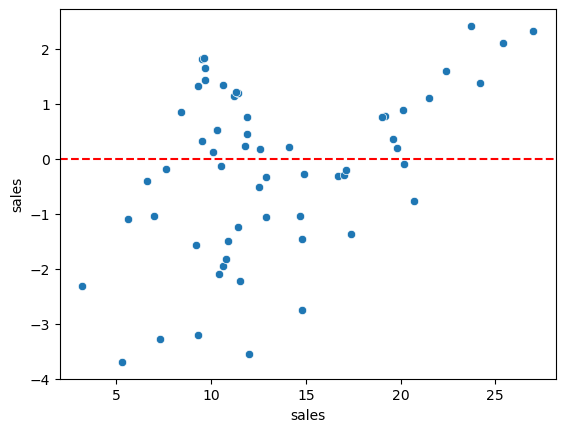

In [44]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [45]:
len(test_res)

60

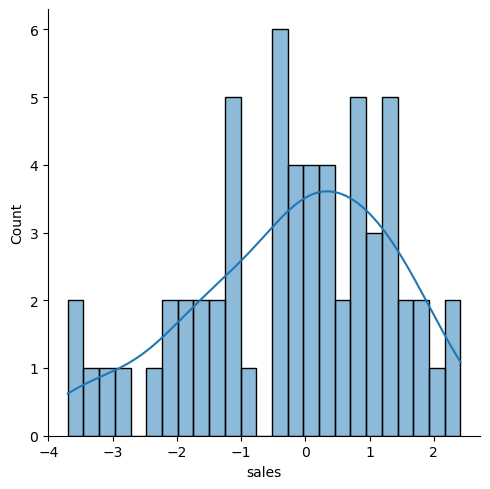

In [46]:
sns.displot(test_res,bins=25,kde=True)

## Повторное обучение модели на полных данных

Если мы довольны работой модели на тестовых данных, то прежде чем передавать модель в эксплуатацию, мы можем выполнить обучение модели на всех данных. (Если же мы не довольны работой модели на тестовых данных, то мы можем поменять значения параметров или вообще выбрать другую модель.

In [49]:
final_model = LinearRegression()

In [50]:
final_model.fit(X,y)

LinearRegression()

Обратите внимание, что здесь уже не имеет смысл заново считать метрику RMSE. Дело в том, что теперь модель увидела все данные, и метрика RMSE уже не будет хорошей оценкой производительности модели, как это было в случае с тестовыми данными.

## Сохранение модели и атрибуты модели

In [51]:
y_hat = final_model.predict(X)

### Остатки (Residuals)

Остатки должны быть нормально распределены.

In [53]:
residuals = y_hat - y

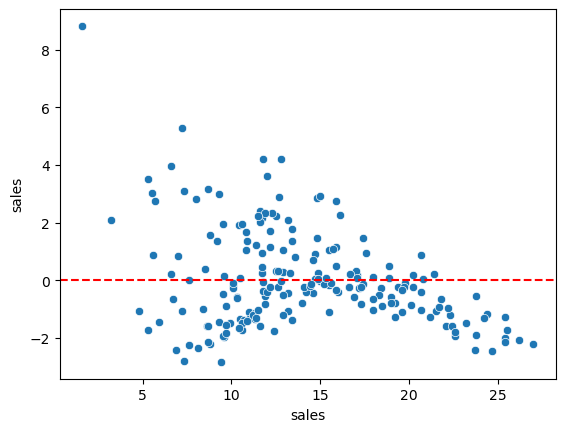

In [54]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Коэффициенты

In [55]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [56]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


Интерпретация коэффициентов:

---
* Когда все другие признаки зафиксированы, то увеличение на 1 "единицу" (на тысячу долларов) признака TV Spend приведёт к увеличению продаж на 0.045 "единиц продаж", в данном случае тысячи единиц. 
* По сути это означает, что на каждые $1000, потраченные на рекламу TV, мы можем ожидать продажи дополнительных 45 единиц товара.
----

---
---
* Когда все другие признаки зафиксированы, то увеличение на 1 "единицу" (на тысячу долларов) признака Radio Spend приведёт к увеличению продаж на 0.188  "единиц продаж", в данном случае тысячи единиц.
* По сути это означает, что на каждые $1000, потраченные на рекламу Radio, мы можем ожидать продажи дополнительных 188 единиц товара.
----
----

* Когда все другие признаки зафиксированы, то увеличение на 1 "единицу" (на тысячу долларов) признака Newspaper Spend приведёт к **уменьшению** продаж на 0.001 "единиц продаж", в данном случае тысячи единиц. 
* По сути это означает, что на каждые $1000, потраченные на рекламу Newspaper Ads, мы на самом деле ожидаем продать на 1 товар меньше. Поскольку эта цифра так близка к нулю, по сути это означает, что реклама в газетах практически не влияет на продажи.
---
---

In [57]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Предсказания для новых данных

Вспомним - X_test выглядит *в точности* так же, как и новые данные. Так что мы можем просто вызвать метод .predict() для предсказания продаж для новой рекламной кампании.

**В нашей следующей рекламной кампании мы планируем потратить 149k на рекламу на ТВ, 22k на рекламу по радио и 12k на рекламу в газетах. Сколько единиц товара мы ожидаем продать в результате такой рекламы?**

In [58]:
campaign = [[149,22,12]]

In [59]:
final_model.predict(campaign)

array([13.893032])

**Насколько это предсказание точное? Очень сложно сказать! Мы знаем только поведение нашей модели на тестовых данных, поэтому нам было важно сначала получить хорошие результаты на тестовых данных прежде, чем обучать модель на всех данных.**

-----

## Сохранение и загрузка модели

In [60]:
from joblib import dump, load

In [62]:
loaded_model = load('sales_model.joblib')

In [63]:
loaded_model.predict(campaign)

array([13.893032])